# Load Data

In [ ]:
import pandas as pd

file_path = "heart.dat"

df = pd.read_csv(file_path, delimiter=' ', header=None)

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


# Deklarasi nama fitur untuk kolom sesuai atribbute information dari file doc

In [45]:
column_names = [
    "age", "sex", "chest_pain_type", "resting_bp", "serum_cholesterol",
    "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_angina",
    "oldpeak", "slope", "num_major_vessels", "thal", "target"
]
df.columns = column_names

df.info

<bound method DataFrame.info of       age  sex  chest_pain_type  resting_bp  serum_cholesterol  \
0    70.0  1.0              4.0       130.0              322.0   
1    67.0  0.0              3.0       115.0              564.0   
2    57.0  1.0              2.0       124.0              261.0   
3    64.0  1.0              4.0       128.0              263.0   
4    74.0  0.0              2.0       120.0              269.0   
..    ...  ...              ...         ...                ...   
265  52.0  1.0              3.0       172.0              199.0   
266  44.0  1.0              2.0       120.0              263.0   
267  56.0  0.0              2.0       140.0              294.0   
268  57.0  1.0              4.0       140.0              192.0   
269  67.0  1.0              4.0       160.0              286.0   

     fasting_blood_sugar  rest_ecg  max_heart_rate  exercise_angina  oldpeak  \
0                    0.0       2.0           109.0              0.0      2.4   
1              

# Double check missing value sesuaiin dengan file doc

In [46]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
serum_cholesterol      0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exercise_angina        0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

# Liat persebaran data

In [47]:
df.describe()

,age,sex,chest_pain_type,resting_bp,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


# Pengelompokkan jenis sample
# Standarisasi & One hot Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


categorical_features = ["chest_pain_type", "rest_ecg", "slope", "thal"]
binary_features = ["sex", "fasting_blood_sugar", "exercise_angina"]
numerical_features = ["age", "resting_bp", "serum_cholesterol", "max_heart_rate", "oldpeak", "num_major_vessels"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features),  
    ],
    remainder="passthrough"  
)

processed_data = preprocessor.fit_transform(df.drop(columns=["target"]))

processed_df = pd.DataFrame(processed_data, columns=[
    *numerical_features, 
    *preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features),
    *binary_features
])

processed_df["target"] = df["target"].values

print(processed_df.head())


        age  resting_bp  serum_cholesterol  max_heart_rate   oldpeak  \
0  1.712094   -0.075410           1.402212       -1.759208  1.181012   
1  1.382140   -0.916759           6.093004        0.446409  0.481153   
2  0.282294   -0.411950           0.219823       -0.375291 -0.656118   
3  1.052186   -0.187590           0.258589       -1.932198 -0.743600   
4  2.152032   -0.636310           0.374890       -1.240239 -0.743600   

   num_major_vessels  chest_pain_type_2.0  chest_pain_type_3.0  \
0           2.472682                  0.0                  0.0   
1          -0.711535                  0.0                  1.0   
2          -0.711535                  1.0                  0.0   
3           0.349871                  0.0                  0.0   
4           0.349871                  1.0                  0.0   

   chest_pain_type_4.0  rest_ecg_1.0  rest_ecg_2.0  slope_2.0  slope_3.0  \
0                  1.0           0.0           1.0        1.0        0.0   
1                 

# Splitting data (random state = 5, splitting test = 20%)

In [ ]:
from sklearn.model_selection import train_test_split

X = processed_df.drop(columns=["target"])
y = processed_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((216, 18), (54, 18), (216,), (54,))

# PLot map untuk selesksi fitur

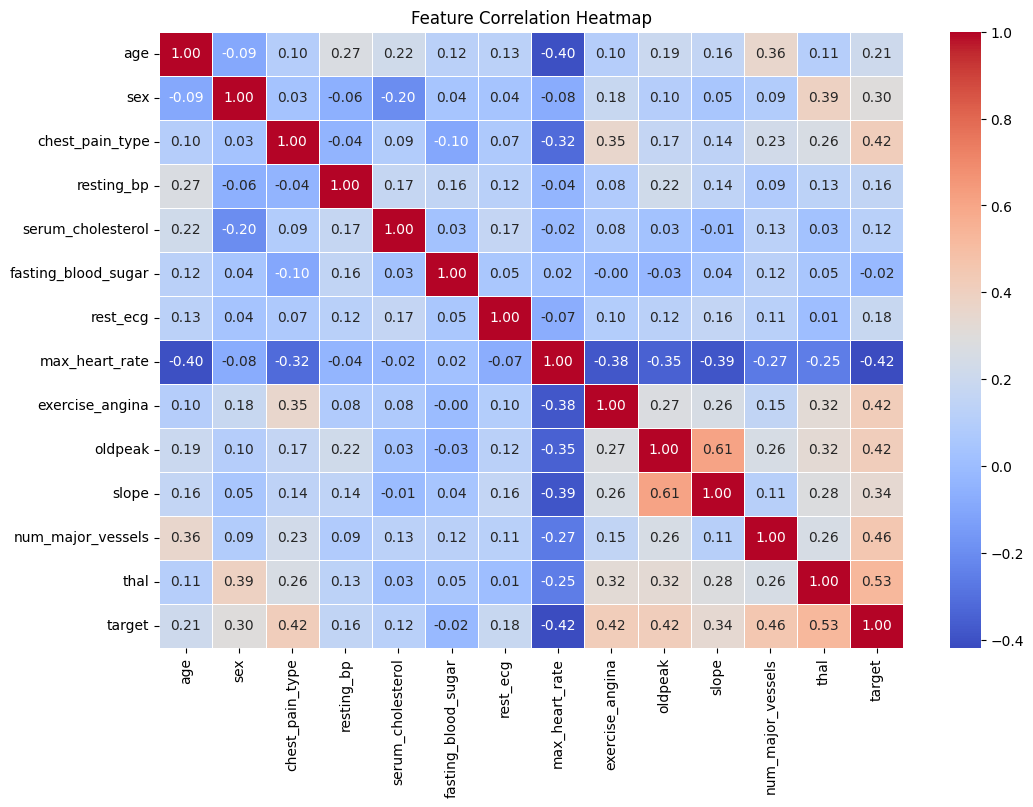

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Menyimpan fitur penting dan drop fitur yang kurang berkolerasi

In [ ]:
selected_features = [
    "chest_pain_type", "max_heart_rate", "oldpeak", "num_major_vessels", "thal", "exercise_angina"
]

df_selected = df[selected_features + ["target"]]

print(df_selected)


     chest_pain_type  max_heart_rate  oldpeak  num_major_vessels  thal  \
0                4.0           109.0      2.4                3.0   3.0   
1                3.0           160.0      1.6                0.0   7.0   
2                2.0           141.0      0.3                0.0   7.0   
3                4.0           105.0      0.2                1.0   7.0   
4                2.0           121.0      0.2                1.0   3.0   
..               ...             ...      ...                ...   ...   
265              3.0           162.0      0.5                0.0   7.0   
266              2.0           173.0      0.0                0.0   7.0   
267              2.0           153.0      1.3                0.0   3.0   
268              4.0           148.0      0.4                0.0   6.0   
269              4.0           108.0      1.5                3.0   3.0   

     exercise_angina  target  
0                0.0       2  
1                0.0       1  
2                0

#  Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=5)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Print results
print("Decision Tree Classifier Results")
print(f"Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:\n", dt_report)
print("\nConfusion Matrix:\n", dt_conf_matrix)


Decision Tree Classifier Results
Accuracy: 0.7407

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.80      0.77        30
           2       0.73      0.67      0.70        24

    accuracy                           0.74        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


Confusion Matrix:
 [[24  6]
 [ 8 16]]


# Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)


y_pred_nb = nb_clf.predict(X_test)


nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Print results
print("Naive Bayes Classifier Results")
print(f"Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report:\n", nb_report)
print("\nConfusion Matrix:\n", nb_conf_matrix)


Naive Bayes Classifier Results
Accuracy: 0.6296

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.87      0.72        30
           2       0.67      0.33      0.44        24

    accuracy                           0.63        54
   macro avg       0.64      0.60      0.58        54
weighted avg       0.64      0.63      0.60        54


Confusion Matrix:
 [[26  4]
 [16  8]]


# Try to optimized

# Decision Tree Classifier

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV 
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt_clf = grid_search.best_estimator_

y_pred_best_dt = best_dt_clf.predict(X_test)

best_dt_accuracy = accuracy_score(y_test, y_pred_best_dt)
best_dt_report = classification_report(y_test, y_pred_best_dt)
best_dt_conf_matrix = confusion_matrix(y_test, y_pred_best_dt)

print("Optimized Decision Tree Classifier Results")
print(f"Accuracy: {best_dt_accuracy:.4f}")
print("\nClassification Report:\n", best_dt_report)
print("\nConfusion Matrix:\n", best_dt_conf_matrix)


Optimized Decision Tree Classifier Results
Accuracy: 0.7778

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.83      0.81        30
           2       0.77      0.71      0.74        24

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54


Confusion Matrix:
 [[25  5]
 [ 7 17]]


# Naive Bayes Classifier

In [56]:
import numpy as np
from sklearn.model_selection import  GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
grid_search_gnb = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gnb.fit(X_train, y_train)

optimized_gnb = grid_search_gnb.best_estimator_
y_pred_optimized_gnb = optimized_gnb.predict(X_test)


optimized_gnb_accuracy = accuracy_score(y_test, y_pred_optimized_gnb)
optimized_gnb_report = classification_report(y_test, y_pred_optimized_gnb)
optimized_gnb_conf_matrix = confusion_matrix(y_test, y_pred_optimized_gnb)


print("optimized Gaussian Naive Bayes Results")
print(f"Accuracy: {optimized_gnb_accuracy:.4f}")
print("Classification Report:\n", optimized_gnb_report)
print("Confusion Matrix:\n", optimized_gnb_conf_matrix)



optimized Gaussian Naive Bayes Results
Accuracy: 0.7593
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.77      0.78        30
           2       0.72      0.75      0.73        24

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54

Confusion Matrix:
 [[23  7]
 [ 6 18]]
